In [34]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '..')

from database.dataset import INBreast_Dataset
from general_utils.plots import plot_blobs2
from mc_candidate_proposal.morphology_mc import MorphologyCalcificationDetection
from tqdm import tqdm
from general_utils.utils import get_center_bboxes
from metrics.metrics import get_tp_fp_fn
from numba.core.errors import NumbaDeprecationWarning, NumbaPendingDeprecationWarning

import warnings
warnings.simplefilter('ignore', category=NumbaDeprecationWarning)
warnings.simplefilter('ignore', category=NumbaPendingDeprecationWarning)

In [33]:
db = INBreast_Dataset(
    return_lesions_mask=True,
    level='image',
    max_lesion_diam_mm=1.0, #max 315 pixels area
    extract_patches=False,
    extract_patches_method='all',  # 'centered'
    patch_size=256,
    stride=256,
    min_breast_fraction_roi=0.5,
    normalize=None,
    partitions = ['train'],
    n_jobs=-1,
    lesion_types=['calcification']
)

In [31]:
import time
rbd_path = '/home/jseia/Desktop/ml-dl/data/recounstructed_by_dialation_img'
md = MorphologyDetection(rbd_path, threshold=0.97, min_distance=0, alternative=False, area=10*10, store_intermediate=True)

idx = 2
case = db[idx]
image = case['img']
image_id = db.df.iloc[idx].img_id
radiouses = case['radiuses']
true_bboxes = db[idx]['lesion_bboxes']
selected_cc_mask, candidate_blobs = md.detect(image, image_id)

tp, fp, fn, gt_d, close_fp = get_tp_fp_fn(true_bboxes, radiouses, candidate_blobs, 7, 0)
img_res = {'img_id': image_id, 'TP': len(tp), 'FP': len(fp), 'FN': len(fn), 'Total P': len(gt_d)+len(fn)}
print(img_res)
radiouses = np.expand_dims(radiouses.astype(int), 1)
gt_centers = get_center_bboxes(true_bboxes)
gt_circles = np.concatenate([gt_centers, radiouses], axis=1)

{'img_id': 20586960, 'TP': 57, 'FP': 12019, 'FN': 1, 'Total P': 40}


{'img_id': 22579893, 'TP': 23, 'FP': 6029, 'FN': 0, 'Total P': 15}


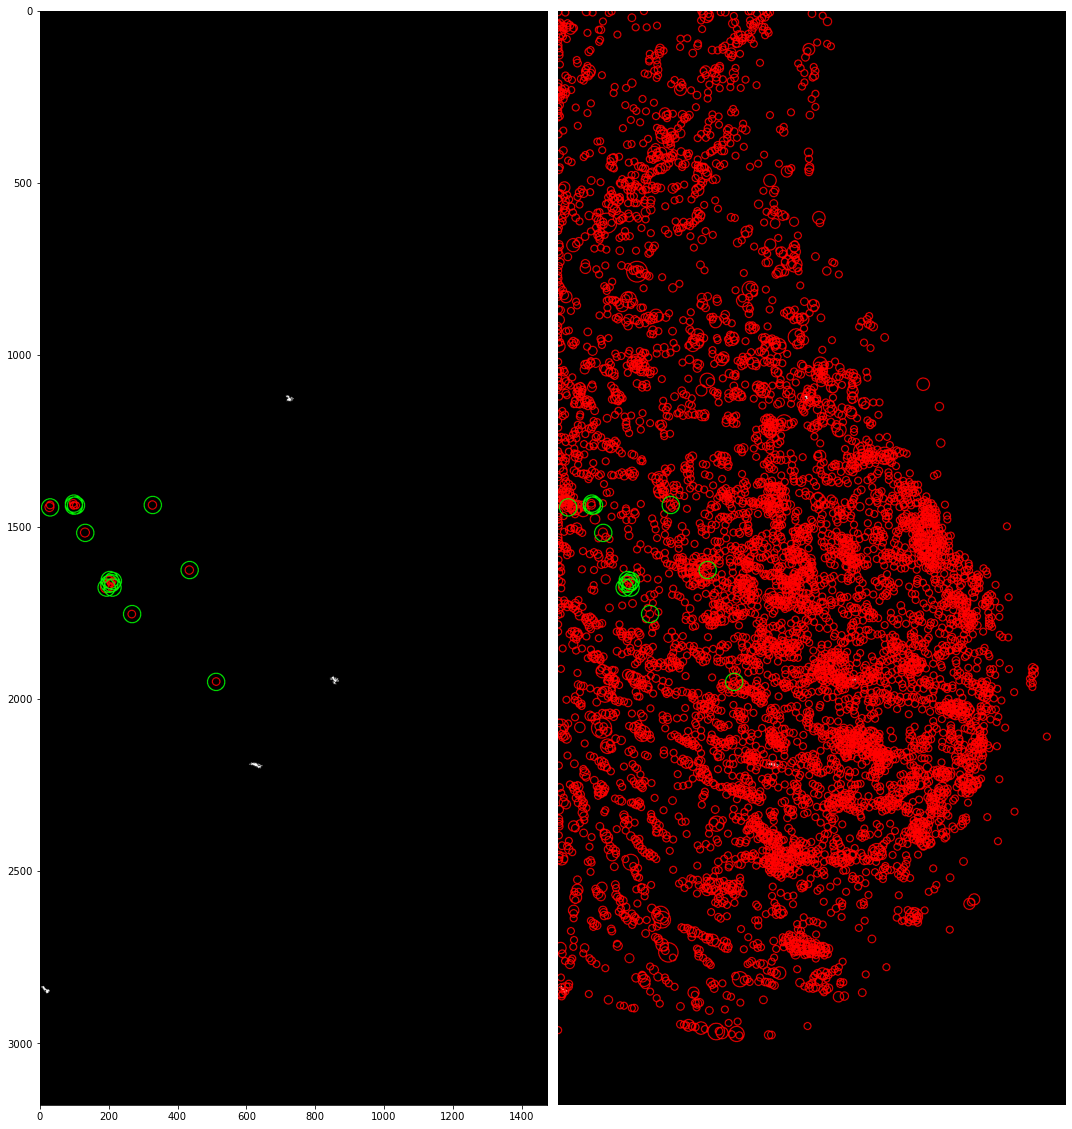

In [21]:
rbd_path = '/home/jseia/Desktop/ml-dl/data/recounstructed_by_dialation_img'
md = MorphologyCalcificationDetection(rbd_path, threshold=0.97, min_distance=6, area=10*10, store_intermediate=True)

idx = 26
case = db[idx]
image = case['img']
image_id = db.df.iloc[idx].img_id
radiouses = case['radiuses']
true_bboxes = db[idx]['lesion_bboxes']
selected_cc_mask, candidate_blobs = md.detect(image, image_id)

tp, fp, fn, gt_d, close_fp = get_tp_fp_fn(true_bboxes, radiouses, candidate_blobs, 7, 0)
img_res = {'img_id': image_id, 'TP': len(tp), 'FP': len(fp), 'FN': len(fn), 'Total P': len(gt_d)+len(fn)}
print(img_res)
radiouses = np.expand_dims(radiouses.astype(int), 1)
gt_centers = get_center_bboxes(true_bboxes)
gt_circles = np.concatenate([gt_centers, radiouses], axis=1)

f, ax = plt.subplots(1, 2, figsize=(15,25))
plot_blobs2(np.where(selected_cc_mask>0,255,0), tp, gt_circles, ax=ax[0])
plot_blobs2(np.where(selected_cc_mask>0,255,0), candidate_blobs, gt_circles, ax=ax[1])
plt.axis('off')
plt.show()

{'img_id': 22613624, 'TP': 2, 'FP': 4116, 'FN': 0, 'Total P': 2}


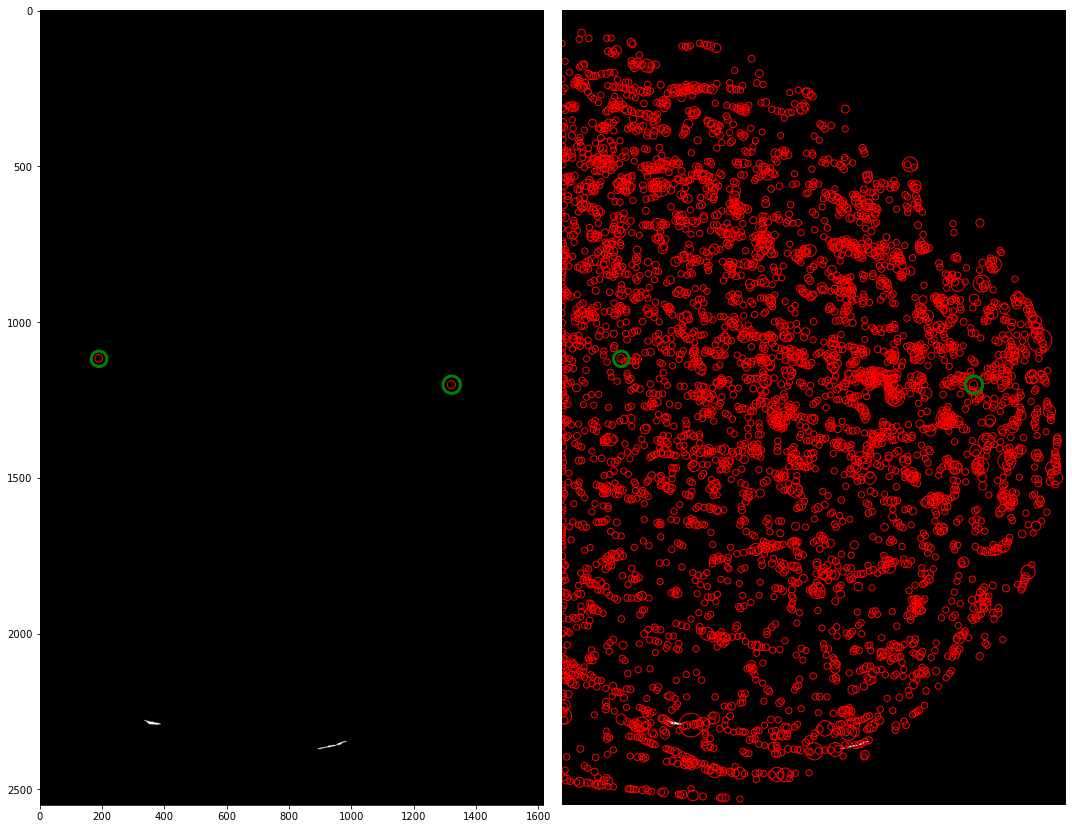

In [ ]:
rbd_path = '/home/jseia/Desktop/ml-dl/data/recounstructed_by_dialation_img'

md = MorphologyCalcificationDetection(rbd_path, threshold=0.97, min_distance=7, area=14*14, store_intermediate=True)

idx = 40
case = db[idx]
image = case['img']
image_id = db.df.iloc[idx].img_id
radiouses = case['radiuses']
true_bboxes = db[idx]['lesion_bboxes']
selected_cc_mask, candidate_blobs = md.detect(image, image_id)

tp, fp, fn, gt_d, close_fp = get_tp_fp_fn(true_bboxes, radiouses, candidate_blobs, 7, 0.1)
img_res = {'img_id': image_id, 'TP': len(tp), 'FP': len(fp), 'FN': len(fn), 'Total P': len(gt_d)+len(fn)}
print(img_res)
radiouses = np.expand_dims(radiouses.astype(int), 1)
gt_centers = get_center_bboxes(true_bboxes)
gt_circles = np.concatenate([gt_centers, radiouses], axis=1)

# f, ax = plt.subplots(1, 2, figsize=(15,25))
# plot_blobs2(selected_cc_mask>0, tp, gt_circles, ax=ax[0])
# plot_blobs2(selected_cc_mask>0, candidate_blobs, gt_circles, ax=ax[1])
# plt.axis('off')
# plt.show()

{'img_id': 24065914, 'TP': 4, 'FP': 3232, 'FN': 4}


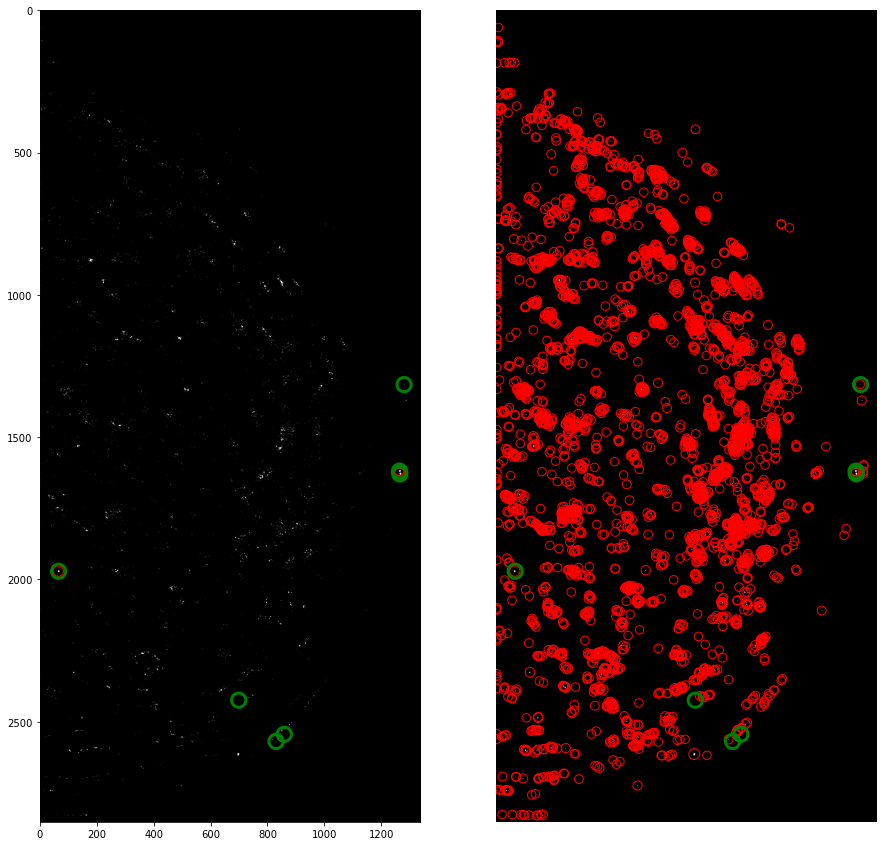

In [51]:
rbd_path = '/home/jseia/Desktop/ml-dl/data/recounstructed_by_dialation_img'

md = MorphologyCalcificationDetection(rbd_path, threshold=0.97, min_distance=7, area=14*14, store_intermediate=True)

idx = 141
case = db[idx]
image = case['img']
image_id = db.df.iloc[idx].img_id
radiouses = case['radiuses']
true_bboxes = db[idx]['lesion_bboxes']
selected_cc_mask, candidate_blobs = md.detect(image, image_id)

tp, fp, fn, gt_d, close_fp = get_tp_fp_fn(true_bboxes, radiouses, candidate_blobs, 7, 0.1)
img_res = {'img_id': image_id, 'TP': len(tp), 'FP': len(fp), 'FN': len(fn)}
print(img_res)

radiouses = np.expand_dims(radiouses.astype(int), 1)
gt_centers = get_center_bboxes(true_bboxes)
gt_circles = np.concatenate([gt_centers, radiouses], axis=1)

f, ax = plt.subplots(1, 2, figsize=(15,25))
plot_blobs2(selected_cc_mask>0, tp, gt_circles, ax=ax[0])
plot_blobs2(selected_cc_mask>0, candidate_blobs, gt_circles, ax=ax[1])
plt.axis('off')
plt.show()

## All dataset test

In [6]:
import time
res_alt_ = []
for idx in tqdm(range(len(db))):
    rbd_path = '/home/jseia/Desktop/ml-dl/data/recounstructed_by_dialation_img'
    md = MorphologyCalcificationDetection(rbd_path, threshold=0.97, min_distance=7, area=14*14, store_intermediate=True)
    case = db[idx]
    image = case['img']
    image_id = db.df.iloc[idx].img_id
    radiouses = case['radiuses']
    true_bboxes = db[idx]['lesion_bboxes']
    start = time.time()
    selected_cc_mask, candidate_blobs = md.detect(image, image_id)
    t = time.time() - start
    tp, fp, fn, gt_d, close_fp = get_tp_fp_fn(true_bboxes, radiouses, candidate_blobs, 7, 0.1)
    img_res = {'img_id': image_id, 'TP': len(tp), 'FP': len(fp), 'FN': len(fn), 'time': t, 'size': image.size}
    res_alt_.append(img_res)

 12%|█▏        | 19/154 [02:02<20:00,  8.89s/it]

In [ ]:
import time
res_ = []
for idx in tqdm(range(len(db))):
    rbd_path = '/home/jseia/Desktop/ml-dl/data/recounstructed_by_dialation_img'
    md = MorphologyCalcificationDetection(rbd_path, threshold=0.97, min_distance=7, area=14*14, store_intermediate=True)
    case = db[idx]
    image = case['img']
    image_id = db.df.iloc[idx].img_id
    radiouses = case['radiuses']
    true_bboxes = db[idx]['lesion_bboxes']
    start = time.time()
    selected_cc_mask, candidate_blobs = md.detect(image, image_id)
    t = time.time() - start
    tp, fp, fn, gt_d, close_fp = get_tp_fp_fn(true_bboxes, radiouses, candidate_blobs, 7, 0.1)
    img_res = {'img_id': image_id, 'TP': len(tp), 'FP': len(fp), 'FN': len(fn), 'time': t, 'size': image.size}
    res_.append(img_res)